In [38]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [40]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  891
Number of columns are:  12


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [45]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [47]:
df.describe(include= 'all').round(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.00,0.38,2.31,NaN,NaN,29.70,0.52,0.38,NaN,32.20,NaN,NaN
std,257.35,0.49,0.84,NaN,NaN,14.53,1.10,0.81,NaN,49.69,NaN,NaN
min,1.00,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN
25%,223.50,0.00,2.00,NaN,NaN,20.12,0.00,0.00,NaN,7.91,NaN,NaN
50%,446.00,0.00,3.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN,NaN
75%,668.50,1.00,3.00,NaN,NaN,38.00,1.00,0.00,NaN,31.00,NaN,NaN


In [48]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in PassengerId is 891
No. of unique values in Survived is 2
No. of unique values in Pclass is 3
No. of unique values in Name is 891
No. of unique values in Sex is 2
No. of unique values in Age is 88
No. of unique values in SibSp is 7
No. of unique values in Parch is 7
No. of unique values in Ticket is 681
No. of unique values in Fare is 248
No. of unique values in Cabin is 147
No. of unique values in Embarked is 3


<function matplotlib.pyplot.show(close=None, block=None)>

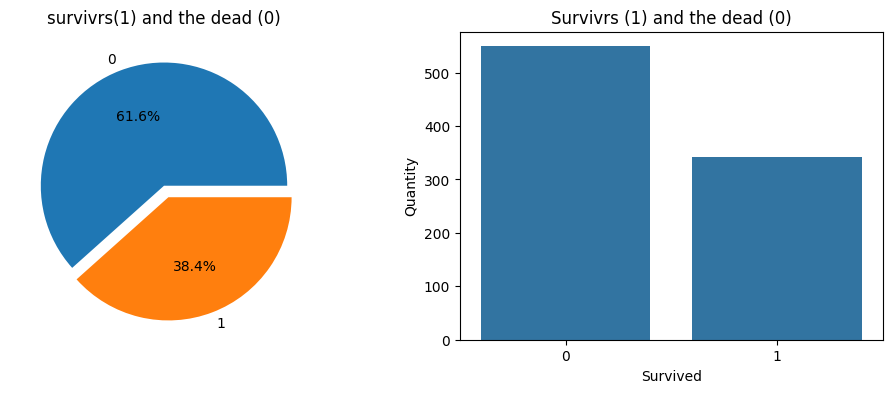

In [49]:
f,ax=plt.subplots(1,2,figsize=(12,4))
df['Survived'].value_counts().plot.pie(
explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('survivrs(1) and the dead (0)')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=df,ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivrs (1) and the dead (0)')
plt.show


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<function matplotlib.pyplot.show(close=None, block=None)>

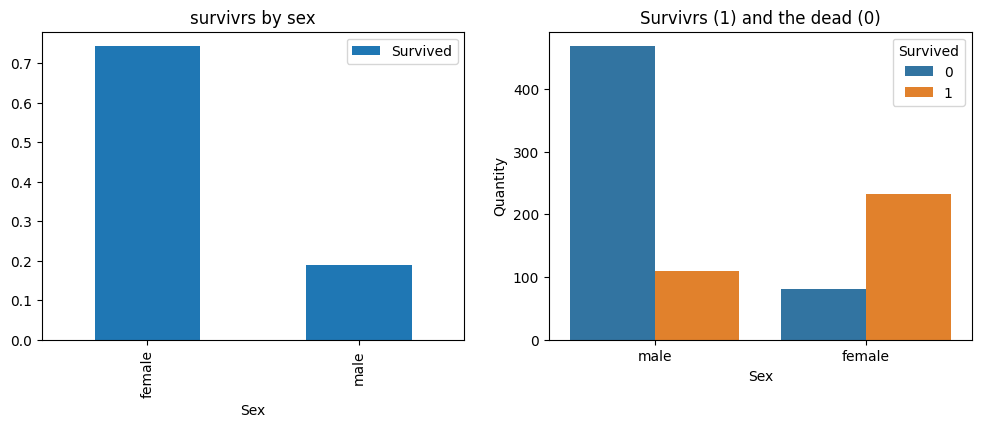

In [50]:
f,ax=plt.subplots(1,2,figsize=(12,4))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('survivrs by sex')
sns.countplot(x='Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivrs (1) and the dead (0)')
plt.show


In [51]:
df=df.drop(['Cabin'],axis=1)
test=test.drop(['Cabin'],axis=1)


In [52]:
df=df.drop(['Ticket'],axis=1)
test=test.drop(['Ticket'],axis=1)

In [53]:
df=df.fillna({"Embarked":"S"})

In [54]:
df["Age"] = df["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager',
          'Student', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df["Age"], bins, labels=labels)
test['AgeGroup'] = pd.cut(test["Age"], bins,labels=labels)

In [55]:
combine = [df, test]

In [56]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False )

pd.crosstab(df['Title'],df['Sex'])
    

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Program Files\KMSpico\temp\ipykernel_5856\1216201388.py:2: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False )


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [57]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['lady','Capt','col','Don','Dr','Major','Rev','Jonker','Dana'],'Rare')
    dataset['Title']=dataset['Title'].replace(['Countess','Lady','Sir','Royel'])
    dataset['Title']=dataset['Title'].replace('Mill','miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')

df[['Title','Survived']].groupby(['Title'],as_index=False).mean()





C:\Program Files\KMSpico\temp\ipykernel_5856\3584761642.py:3: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  dataset['Title']=dataset['Title'].replace(['Countess','Lady','Sir','Royel'])


,Title,Survived
0,Col,0.500000
1,Jonkheer,0.000000
2,Master,0.575000
3,Miss,0.699454
4,Mlle,1.000000
5,Mr,0.161538
6,Mrs,0.793651
7,Rare,0.235294


In [58]:
titel_mapping={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Royel":5,"Rare":6}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(titel_mapping)
    dataset['Title']=dataset['Title'].fillna(0)

In [59]:
mr_age=df[df["Title"]==1]["AgeGroup"].mode()
miss_age=df[df["Title"]==2]["AgeGroup"].mode()
mrs_age=df[df["Title"]==3]["AgeGroup"].mode()
master_age=df[df["Title"]==4]["AgeGroup"].mode()
royel_age=df[df["Title"]==5]["AgeGroup"].mode()
rare_age=df[df["Title"]==6]["AgeGroup"].mode()

age_tite_mapping={1:"Yun adut ",2:"Student",3:"Adut",4:"Baby",5:"adut",6:"Adut"}

for x in range(len(df["AgeGroup"])):
    if df["AgeGroup"][x]=="Unknown":
         df["AgeGroup"][x]==age_tite_mapping[df["Title"][x]]

for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x]=="Unknown":
        test["AgeGroup"][x]==age_tite_mapping[test["Title"][x]]

In [60]:
age_mapping={'Baby':1,'Chid':2,'Teenager':3,'Student':4,'Young adult':5,'Adult':6,'Senior':7}
df['AgeGroup']=df['AgeGroup'].map(age_mapping)
test['AgeGroup']=test['AgeGroup'].map(age_mapping)

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,6.0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,NaN,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,NaN,1.0


In [62]:
df=df.drop(['Age'],axis=1)
test=test.drop(['Age'],axis=1)

df=df.drop(['Name'],axis=1)
test=test.drop(['Name'],axis=1)

In [63]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,male,1,0,7.2500,S,4.0,1.0
1,2,1,1,female,1,0,71.2833,C,6.0,3.0
2,3,1,3,female,0,0,7.9250,S,NaN,2.0
3,4,1,1,female,1,0,53.1000,S,NaN,3.0
4,5,0,3,male,0,0,8.0500,S,NaN,1.0


In [64]:
sex_mapping={"male":0,"female":1}
df['Sex']=df['Sex'].map(sex_mapping)
test['Sex']=test['Sex'].map(sex_mapping)

embark_mapping={"S":1,"C":2,"Q":3}
df['Embarked']==df['Embarked'].map(embark_mapping)
test['Embarked']==test['Embarked'].map(embark_mapping)

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Embarked, Length: 418, dtype: bool

In [65]:
for x in range (len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass=test["Pclass"][x]
        test["Fare"][x]=round(df[df["Pclass"]==pclass]["Fare"].mean(),4)

C:\Program Files\KMSpico\temp\ipykernel_5856\917291705.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test["Fare"][x]=round(df[df["Pclass"]==pclass]["Fare"].mean(),4)
C:\Program Files\KMSpico\temp\ipykernel_5856\917291705.py:4: SettingW

In [66]:
df['FareBand']=pd.qcut(df['Fare'],4,labels=[1,2,3,4])
test['FareBand']=pd.qcut(test['Fare'],4,labels=[1,2,3,4])

df=df.drop(['Fare'],axis=1)
test=test.drop(['Fare'],axis=1)


In [67]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,1,0,3,0,1,0,S,4.0,1.0,1
1,2,1,1,1,1,0,C,6.0,3.0,4
2,3,1,3,1,0,0,S,NaN,2.0,2
3,4,1,1,1,1,0,S,NaN,3.0,4
4,5,0,3,0,0,0,S,NaN,1.0,2


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [83]:
predictrs=df.drop(['Survived','PassengerId'],axis=1)
target=df["Survived"]

X=df[['Pclass','SibSp','Parch']]
y=df['AgeGroup']

X.fillna(X.mean(),inplace=True)
y.fillna(y.mean(),inplace=True)



X_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0)

C:\Program Files\KMSpico\temp\ipykernel_5856\1734894727.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(),inplace=True)


In [84]:
mde=LinearRegression()
mde.fit(X_train,y_train)

LinearRegression()

In [86]:
y_pred=mde.predict(x_val)
mse=mean_squared_error(y_val,y_pred)
print('mean_squared_error',mse)

mean_squared_error 1.0988398765001188
